In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
BASE_PATH = 'expedientes/'

In [4]:
expts_10 = pd.read_csv(BASE_PATH+'ExpedientesPublicados2010.csv', encoding="ISO-8859-1")

In [39]:
expts_11 = pd.read_csv(BASE_PATH+'ExpedientesPublicados2011.csv', encoding="ISO-8859-1")

In [ ]:
expts_12 = pd.read_csv(BASE_PATH+'ExpedientesPublicados2012.csv', encoding="ISO-8859-1")

In [ ]:
expts_13 = pd.read_csv(BASE_PATH+'ExpedientesPublicados2013.csv', encoding="ISO-8859-1")

In [ ]:
expts_14 = pd.read_csv(BASE_PATH+'ExpedientesPublicados2014.csv', encoding="ISO-8859-1")

In [ ]:
expts_15 = pd.read_csv(BASE_PATH+'ExpedientesPublicados2015.csv', encoding="ISO-8859-1")

In [ ]:
expts_16 = pd.read_csv(BASE_PATH+'ExpedientesPublicados2016.csv', encoding="ISO-8859-1")

In [ ]:
expts_17 = pd.read_csv(BASE_PATH+'ExpedientesPublicados2017.csv', encoding="ISO-8859-1")

In [9]:
expts_18 = pd.read_excel(BASE_PATH+'ExpedientesPublicados2018.xlsx')

c:\Users\juan-\Desktop\compra_publica_2010_2022\env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
expts_19 = pd.read_csv(BASE_PATH+'ExpedientesPublicados2019.xlsx', encoding="ISO-8859-1")

In [ ]:
expts_20 = pd.read_csv(BASE_PATH+'ExpedientesPublicados2020.xlsx', encoding="ISO-8859-1")

In [ ]:
expts_21 = pd.read_csv(BASE_PATH+'ExpedientesPublicados2021.xlsx', encoding="ISO-8859-1")

In [ ]:
expts_22 = pd.read_csv(BASE_PATH+'ExpedientesPublicados2022.xlsx', encoding="ISO-8859-1")

In [ ]:
expts_10['year'] = '2010'
expts_11['year'] = '2011'
expts_12['year'] = '2012'
expts_13['year'] = '2013'
expts_14['year'] = '2014'
expts_15['year'] = '2015'
expts_16['year'] = '2016'
expts_17['year'] = '2017'
expts_18['year'] = '2018'
expts_19['year'] = '2019'
expts_20['year'] = '2020'
expts_21['year'] = '2021'
expts_22['year'] = '2022'

In [97]:
expedientes = pd.concat([expts_10,expts_11],ignore_index=True)

In [ ]:
expedientes['VIGENCIA_ANUNCIO'] = pd.to_datetime(expedientes['VIGENCIA_ANUNCIO'], infer_datetime_format=True)

In [66]:
expedientes.keys()

Index(['CODIGO_EXPEDIENTE', 'NUMERO_PROCEDIMIENTO', 'REFERENCIA_EXPEDIENTE',
       'TIPO_EXPEDIENTE', 'DESCRIPCION_EXPEDIENTE', 'DESCRIPCION_ANUNCIO',
       'CLAVE_UC', 'UC', 'OPERADOR', 'CORREO', 'ENTIDAD_FEDERATIVA',
       'TIPO_CONTRATACION', 'PUBLICACION_ANUNCIO', 'VIGENCIA_ANUNCIO',
       'LIGA_ANUNCIO'],
      dtype='object')

In [83]:
expedientes.head(3)

,CODIGO_EXPEDIENTE,NUMERO_PROCEDIMIENTO,REFERENCIA_EXPEDIENTE,TIPO_EXPEDIENTE,DESCRIPCION_EXPEDIENTE,DESCRIPCION_ANUNCIO,CLAVE_UC,UC,OPERADOR,CORREO,ENTIDAD_FEDERATIVA,TIPO_CONTRATACION,PUBLICACION_ANUNCIO,VIGENCIA_ANUNCIO,LIGA_ANUNCIO,tipo_exp
0,348,SA-019HXA001-N1-2010,NaN,Z15122015 12. Adjudicación Directa Nacional Si...,Vales de despensa de fin de año 2010,Contratacion especifica de vales de despensa,007HXA001,ISSFAM-SUBDIRECCIÓN DE RECURSOS MATERIALES. #0...,Nadia Dominguez Martinez,adquisiciones@issfam.gob.mx,No especificado por la UC,No especificado por la UC,NaN,2010-12-03 00:00,https://compranet.funcionpublica.gob.mx/esop/g...,Adjudicación
1,399,LA-006HHQ001-N4-2010,NaN,sub110525_01. Licitación Pública Nacional LAASSP,Seguros de Vida,Seguros de Vida,006HHQ001,LOTENAL-Gerencia de Recursos Materiales #006HH...,Sara Gabriela Morales Velazquez,smorales@lotenal.gob.mx,No especificado por la UC,No especificado por la UC,NaN,2010-12-15 00:00,https://compranet.funcionpublica.gob.mx/esop/g...,Licitación
2,409,SA-019GYN006-N1-2010,NaN,Z15122015 12. Adjudicación Directa Nacional Si...,VALES DE DESPENSA,VALES DE DESPENSA 2010,051GYN006,ISSSTE-Jefatura de Servicios de Adquisiciones ...,Fermín Benítez Girón,user.loked@gmail.com,No especificado por la UC,No especificado por la UC,NaN,2010-12-09 00:00,https://compranet.funcionpublica.gob.mx/esop/g...,Adjudicación


## Transformaciones

### tipo_exp

In [77]:
def clasify_tipo_exp(tipo_exp:str) -> str:
    """check for keywords in @tipo_exp and return 
        "licitacion", "adjudicacion" or "invitacion" 
    """
    if "Adjudicación" in tipo_exp:
        return  "Adjudicación"

    elif "Licitación" in tipo_exp:
        return "Licitación"

    elif "Invitación" in tipo_exp:
        return "Invitación"

    else:
        return "otros"


In [98]:
expedientes['TIPO_EXPEDIENTE'].apply(clasify_tipo_exp).value_counts()

Adjudicación    27568
Licitación      21276
Invitación      12995
otros             161
Name: TIPO_EXPEDIENTE, dtype: int64

In [99]:
expedientes['tipo_exp'] = expedientes['TIPO_EXPEDIENTE'].apply(clasify_tipo_exp)

### Unidad compradora

In [115]:
expedientes['siglas_uc'] = expedientes['UC'].apply(lambda uc : uc.split("-")[0])

In [121]:
expedientes['siglas_uc'].value_counts()

CFE           19123
IMSS           4698
SCT            2658
CONAGUA        1588
BANJERCITO     1315
              ...  
UPCP              1
COLMICH           1
RAN               1
CIMAT             1
CONUEE            1
Name: siglas_uc, Length: 247, dtype: int64

## Graficas 

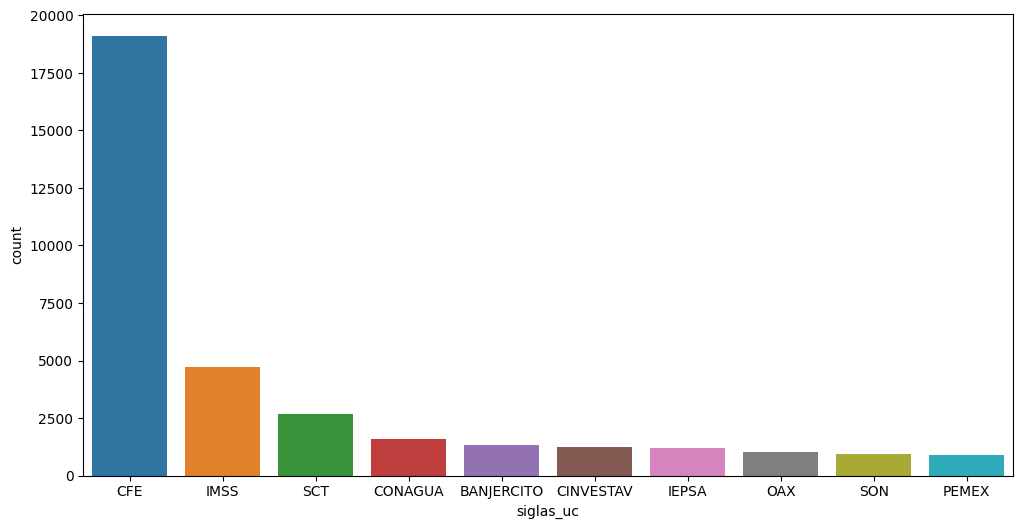

In [139]:
plt.figure(figsize=(12,6))
sns.countplot(x='siglas_uc',data=expedientes,order=pd.value_counts(expedientes['siglas_uc']).iloc[:10].index)
plt.show()

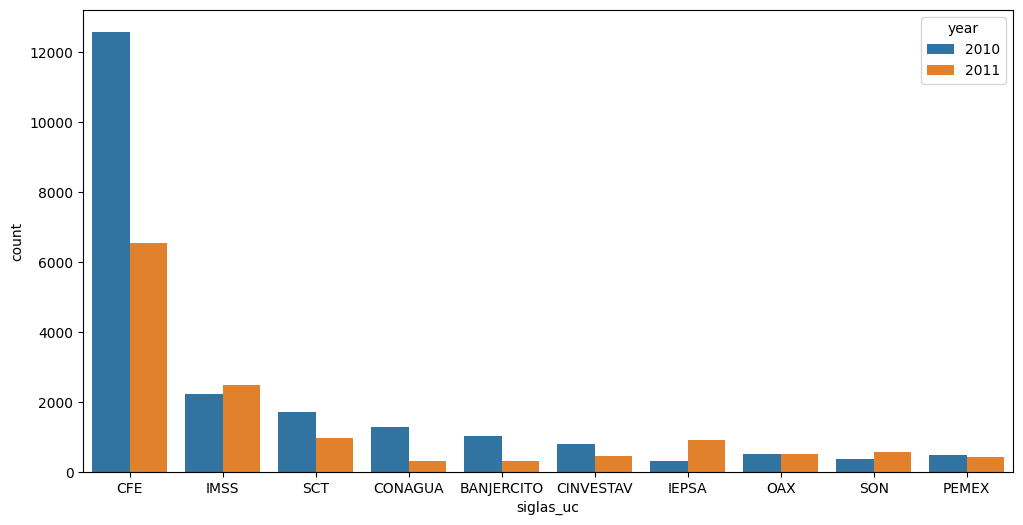

In [140]:
plt.figure(figsize=(12,6))
sns.countplot(x='siglas_uc',data=expedientes,order=pd.value_counts(expedientes['siglas_uc']).iloc[:10].index, hue='year')
plt.show()

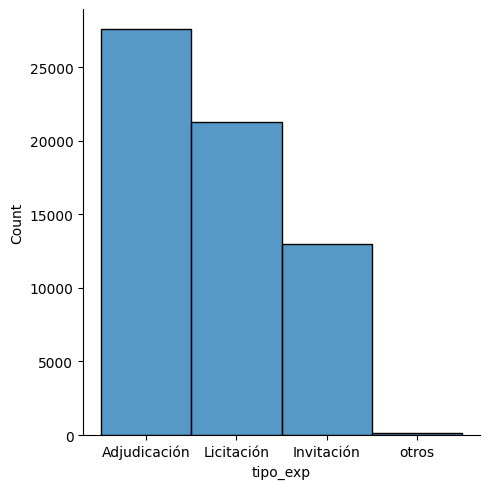

In [100]:
sns.displot(data=expedientes, x='tipo_exp')
plt.show()

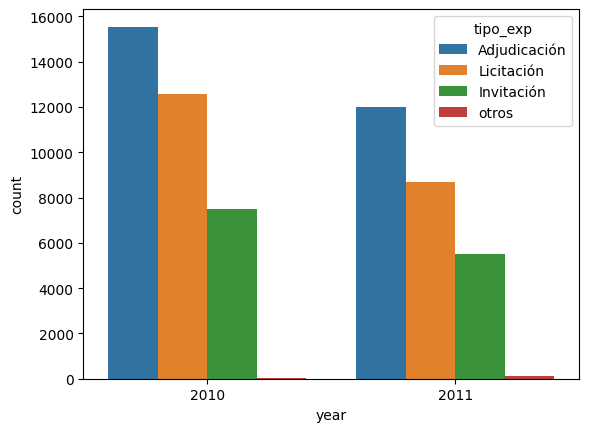

In [122]:
sns.countplot(data=expedientes, x='year',hue='tipo_exp')
plt.show()

## Graficas individuales